# According to the latest meeting, here is the new analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')

In [5]:
data = pd.read_csv("DATA111_2DAILY_V0.csv")

<a id=0></a>

# Exploratory Data Analysis V2

*In this notebook im going to analyze some hypothesis:*

- [1.  Days with bigger pression are also colder (Max air pression x Min air temperature)](#1)
- [2.  Also, days with larger pression are driest (Max air pression x Mn air moisture)](#2)
- [3.  Heatwave: New visualizations](#3)

In [6]:
data.head()

,YEAR,DAY365,MAX_N_WNDVEL_5M,DIR_MAX_N_WNDVEL_5M,MIN_N_WNDVEL_5M,DIR_MIN_N_WNDVEL_5M,MEAN_N_WNDVEL_5M,MAX_N_WNDVEL_2M,DIR_MAX_N_WNDVEL_2M,MIN_N_WNDVEL_2M,...,MIN_N_PRESSION_HPA,DIR_MIN_N_PRESSION_HPA,MEAN_N_PRESSION_HPA,MAX_N_RAIN_SUM10,DIR_MAX_N_RAIN_SUM10,MIN_N_RAIN_SUM10,DIR_MIN_N_RAIN_SUM10,MEAN_N_RAIN_SUM10,MONTH,WEEK
0,1997.0,1.0,5561.0,9.33,0.892,31.87,2302.065328,3075.0,134.40,0.763,...,940.0,181.40,942.831933,0.0,8.32,0.0,8.32,0.0,1,0.0
1,1997.0,2.0,4266.0,154.70,0.363,63.72,1949.374418,2876.0,152.00,0.626,...,942.0,125.60,943.809091,0.0,131.60,0.0,131.60,0.0,1,0.0
2,1997.0,3.0,4835.0,162.40,2.050,131.10,2560.208496,2907.0,94.80,0.717,...,944.0,125.40,945.424779,0.0,148.20,0.0,148.20,0.0,1,0.0
3,1997.0,4.0,3246.0,157.30,0.461,40.96,1256.941059,1942.0,7.12,0.000,...,941.0,24.88,943.075630,0.0,157.30,0.0,157.30,0.0,1,0.0
4,1997.0,5.0,4188.0,147.10,0.000,157.70,1198.817863,2646.0,9.39,0.000,...,940.0,60.63,942.717742,0.0,19.87,0.0,19.87,0.0,1,0.0


In [7]:
data.columns.values

array(['YEAR', 'DAY365', 'MAX_N_WNDVEL_5M', 'DIR_MAX_N_WNDVEL_5M',
       'MIN_N_WNDVEL_5M', 'DIR_MIN_N_WNDVEL_5M', 'MEAN_N_WNDVEL_5M',
       'MAX_N_WNDVEL_2M', 'DIR_MAX_N_WNDVEL_2M', 'MIN_N_WNDVEL_2M',
       'DIR_MIN_N_WNDVEL_2M', 'MEAN_N_WNDVEL_2M', 'MAX_N_WNDDIR_DEGREE',
       'DIR_MAX_N_WNDDIR_DEGREE', 'MIN_N_WNDDIR_DEGREE',
       'DIR_MIN_N_WNDDIR_DEGREE', 'MEAN_N_WNDDIR_DEGREE',
       'MAX_N_INCRAD_10MSR', 'DIR_MAX_N_INCRAD_10MSR',
       'MIN_N_INCRAD_10MSR', 'DIR_MIN_N_INCRAD_10MSR',
       'MEAN_N_INCRAD_10MSR', 'MAX_N_REFRAD_10MSR',
       'DIR_MAX_N_REFRAD_10MSR', 'MIN_N_REFRAD_10MSR',
       'DIR_MIN_N_REFRAD_10MSR', 'MEAN_N_REFRAD_10MSR',
       'MAX_N_PHTFLOW_10MSR', 'DIR_MAX_N_PHTFLOW_10MSR',
       'MIN_N_PHTFLOW_10MSR', 'DIR_MIN_N_PHTFLOW_10MSR',
       'MEAN_N_PHTFLOW_10MSR', 'MAX_N_NHTFLOW_10MSR',
       'DIR_MAX_N_NHTFLOW_10MSR', 'MIN_N_NHTFLOW_10MSR',
       'DIR_MIN_N_NHTFLOW_10MSR', 'MEAN_N_NHTFLOW_10MSR',
       'MAX_N_AIRMTR_PCT10', 'DIR_MAX_N_AIRMTR_PCT10

<a id=1></a>

# 1. Days with bigger pression are also colder (Max air pression x Min air temperature)

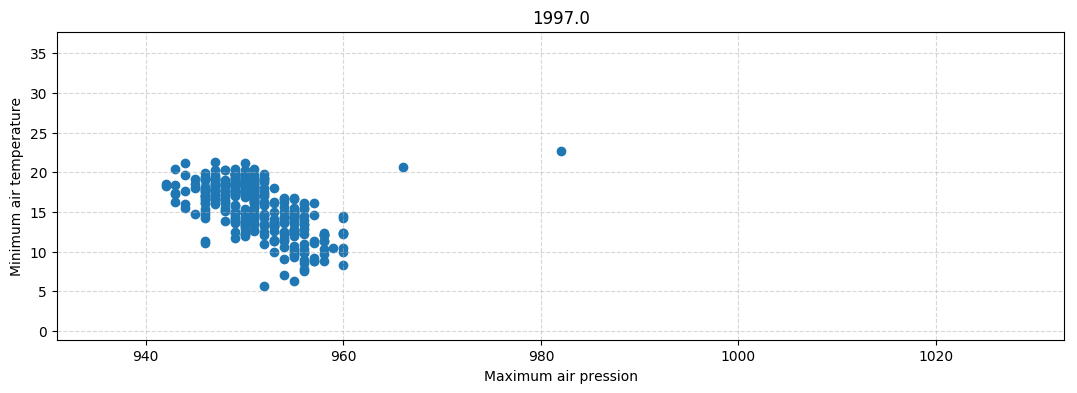

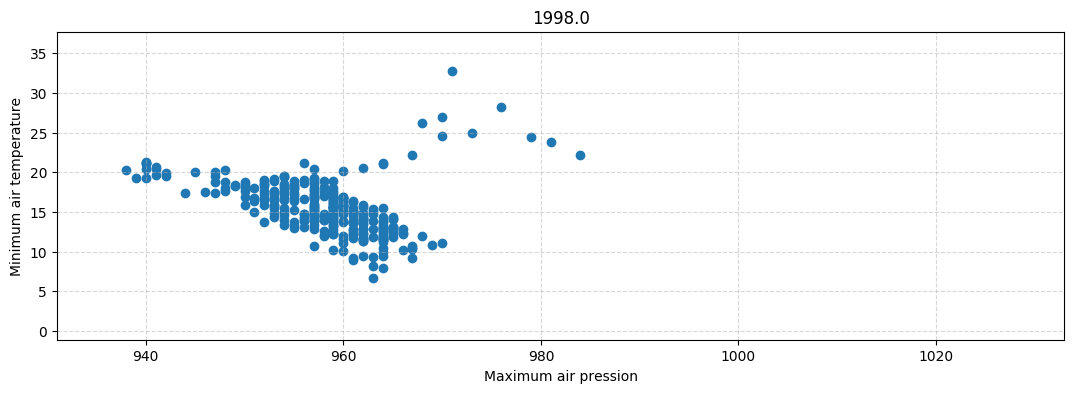

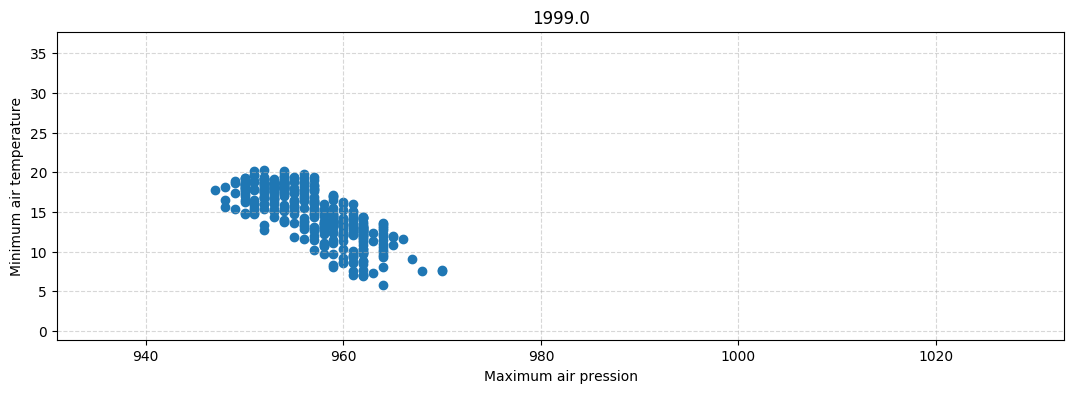

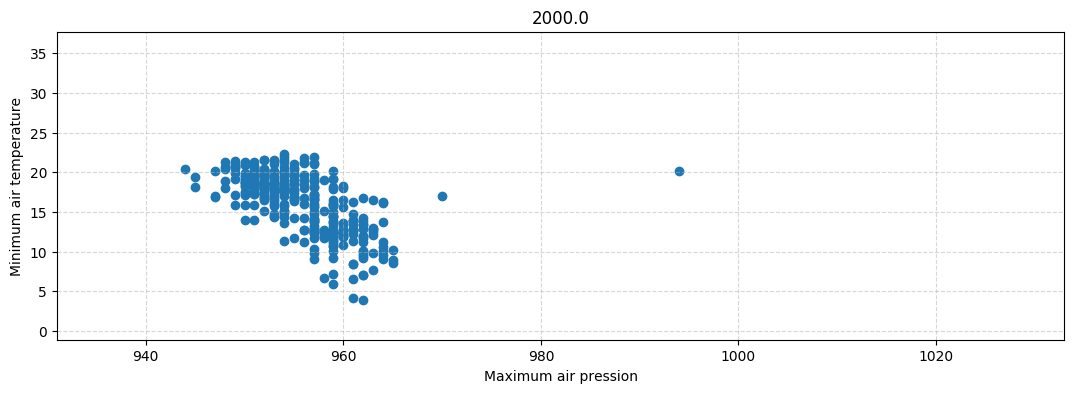

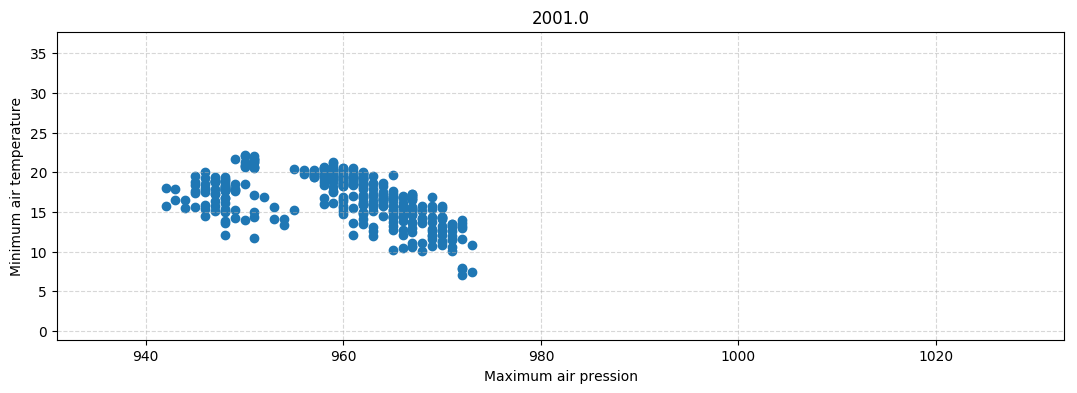

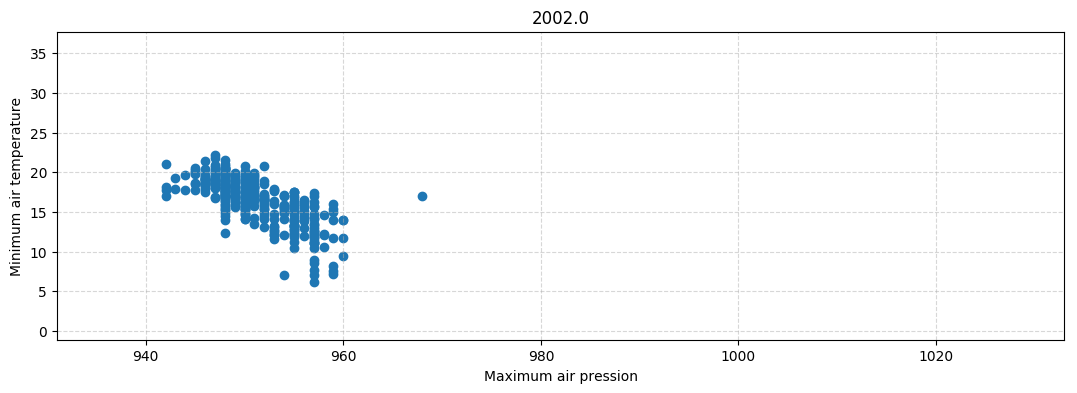

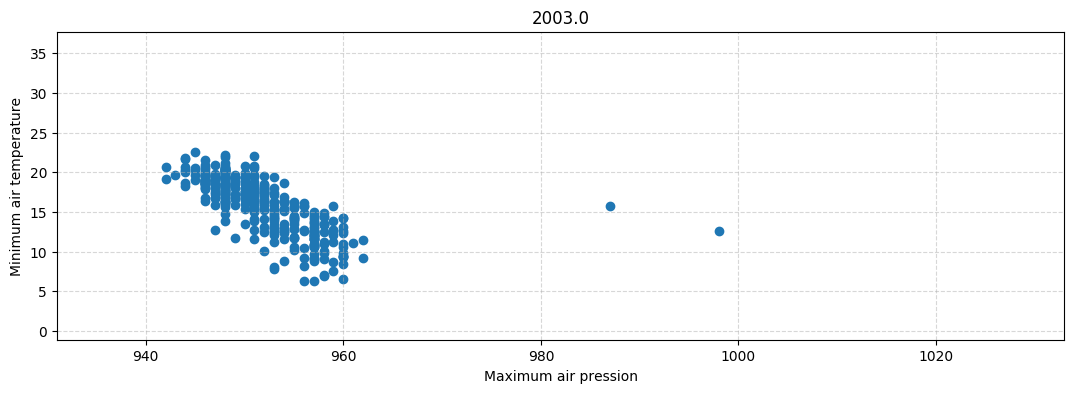

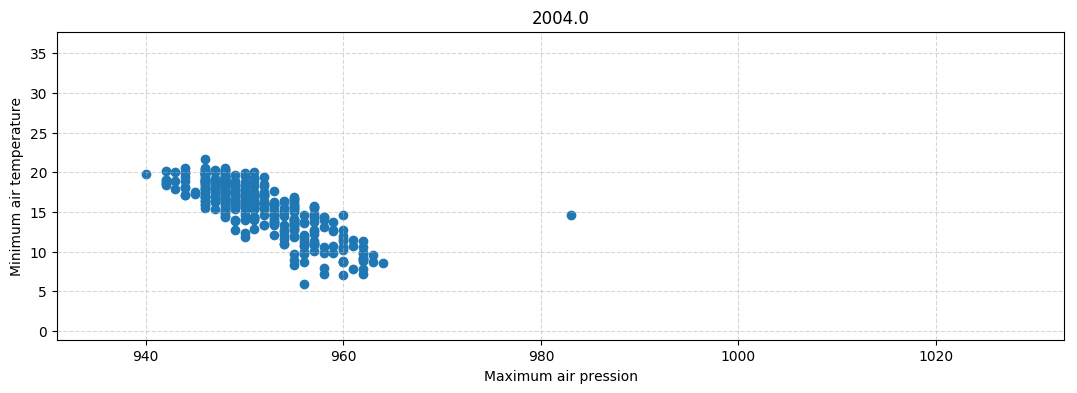

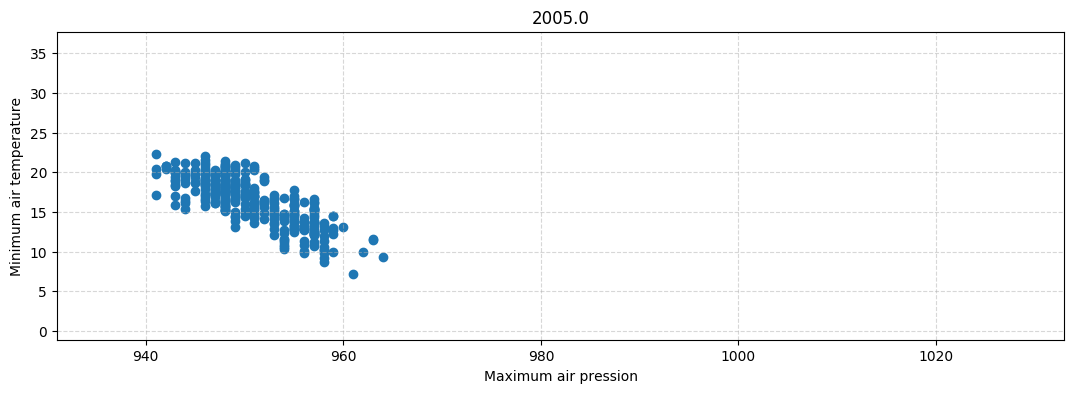

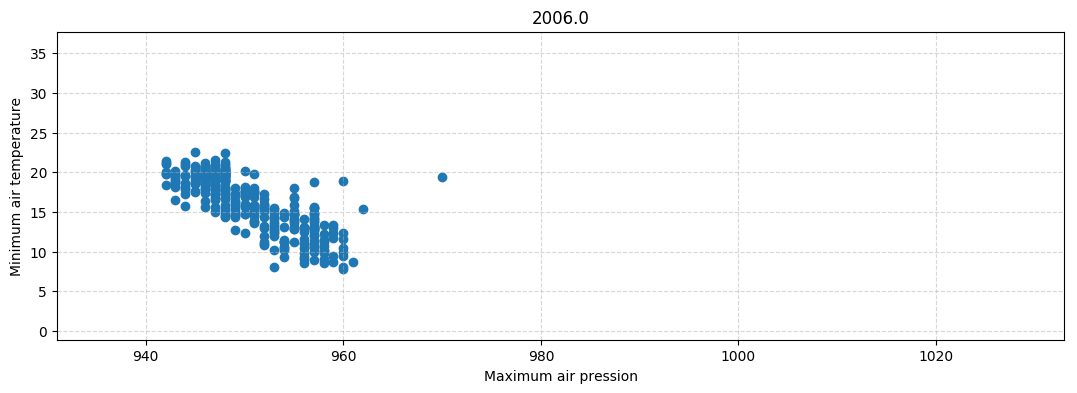

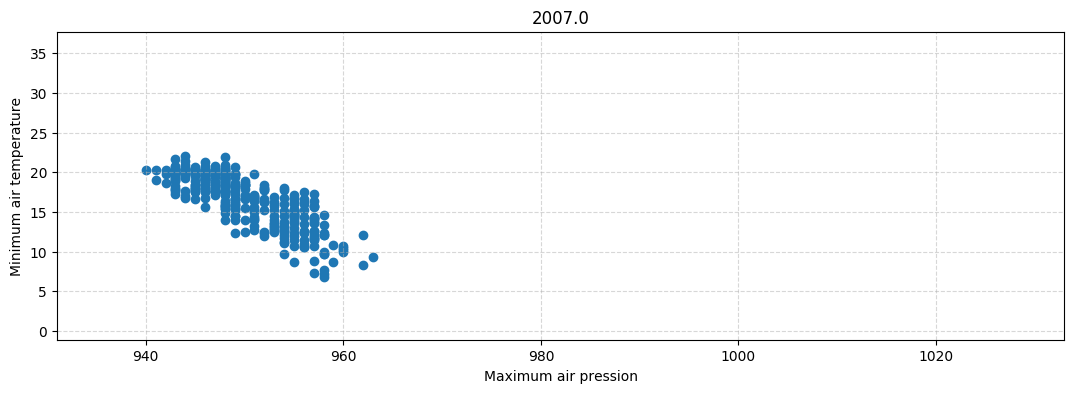

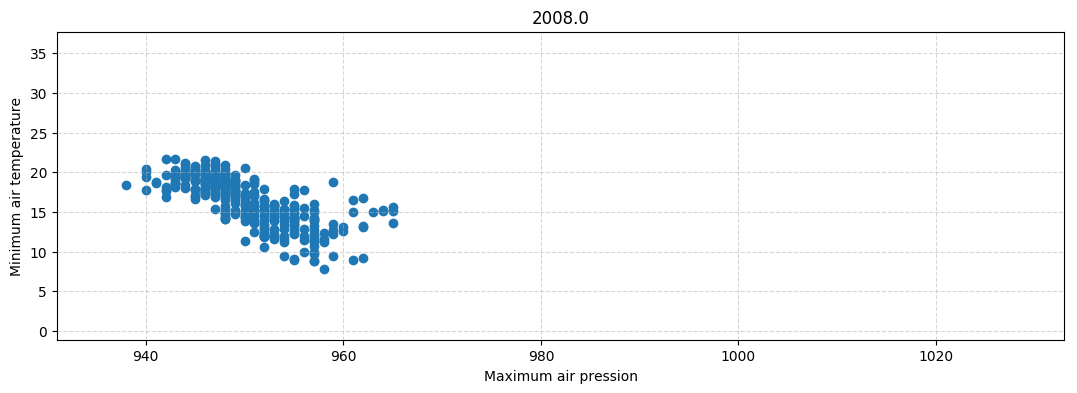

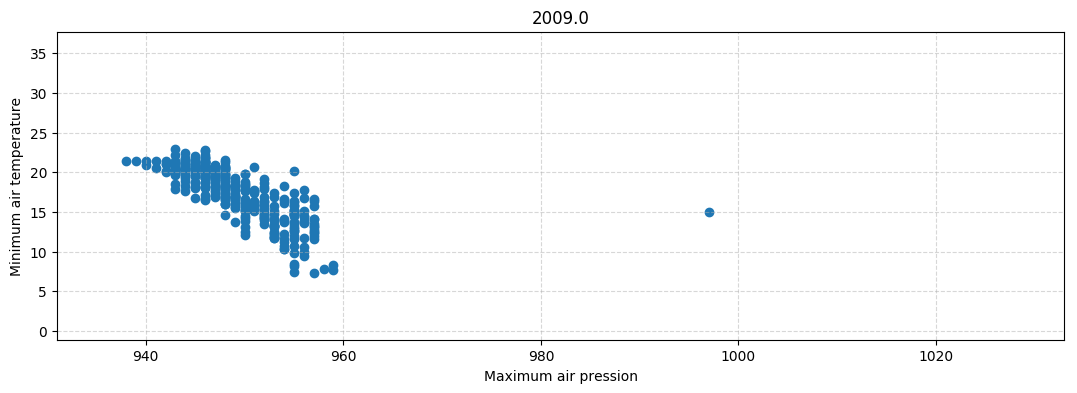

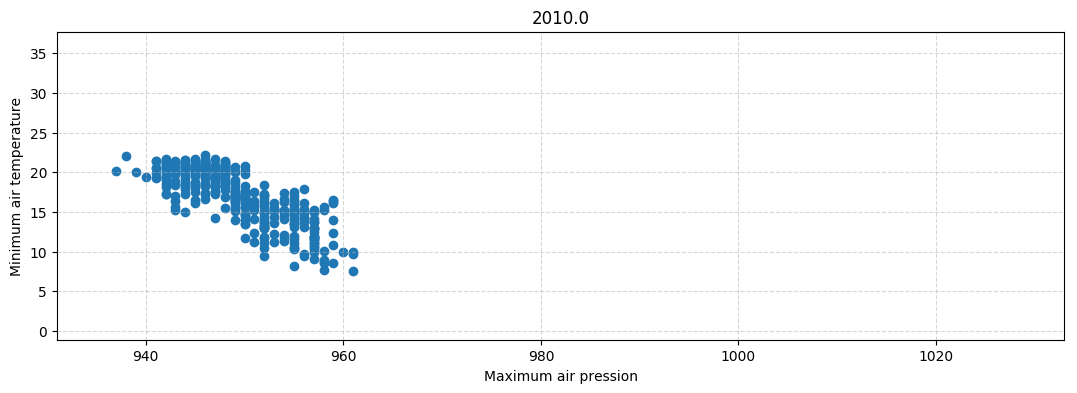

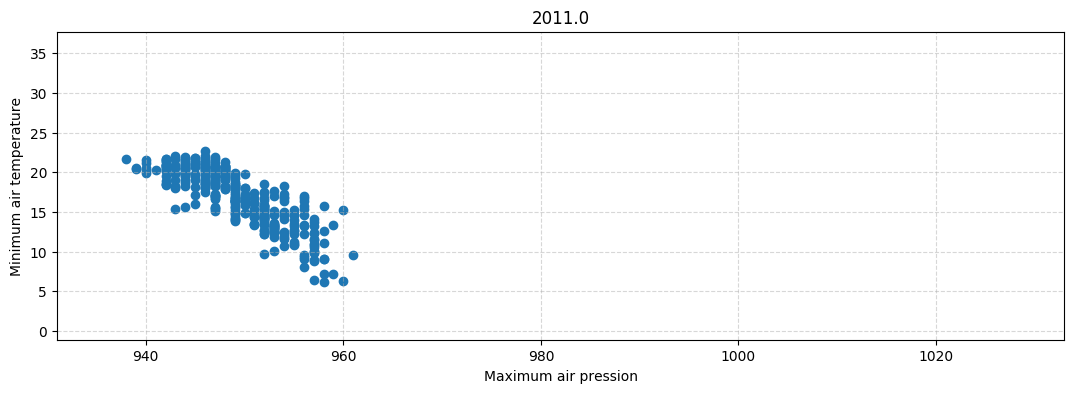

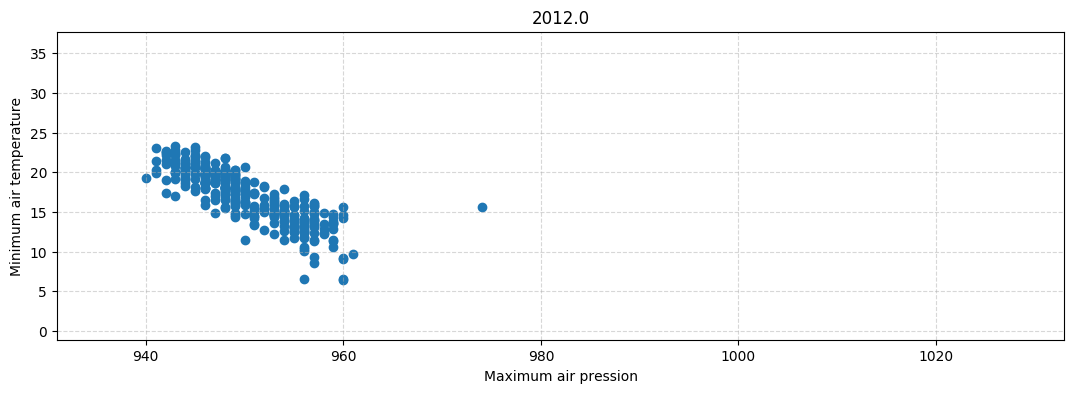

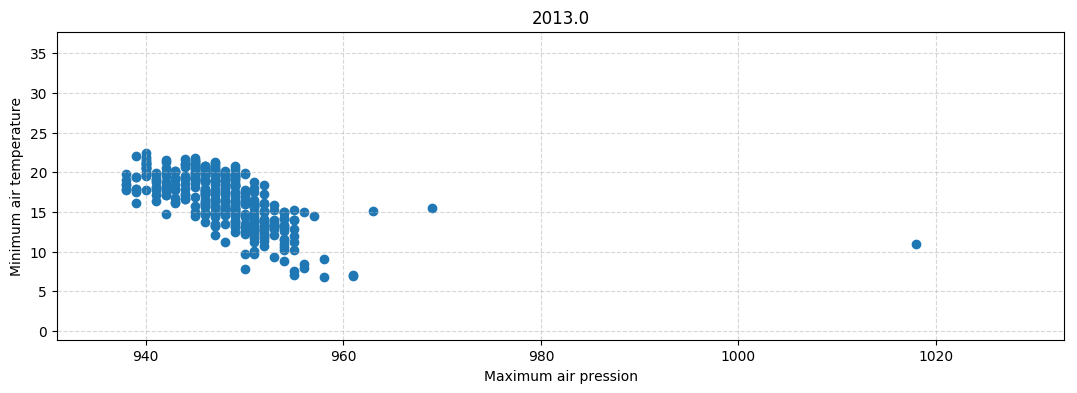

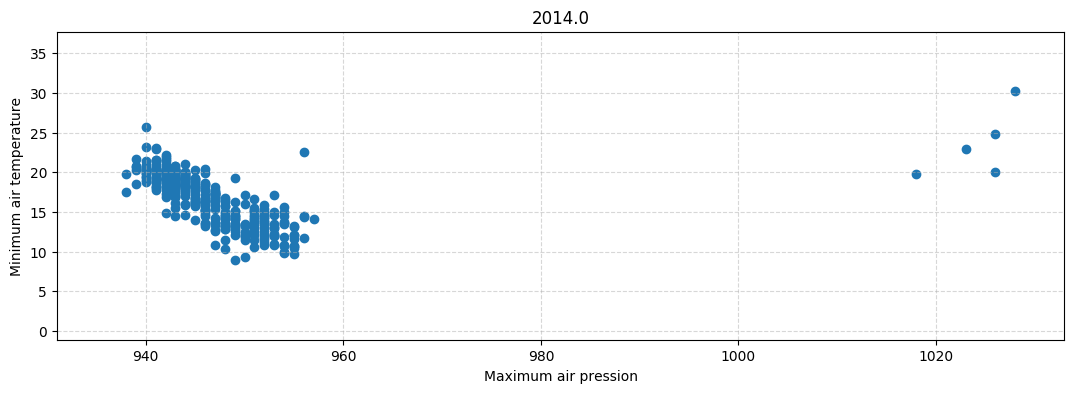

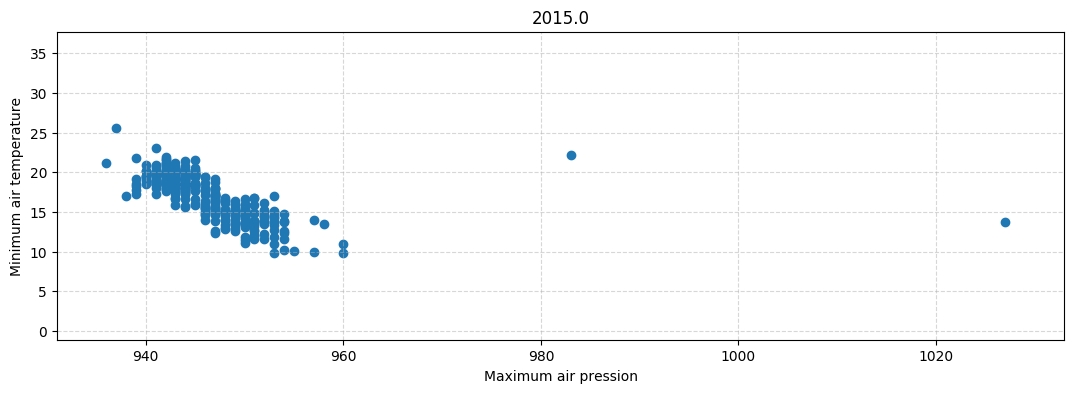

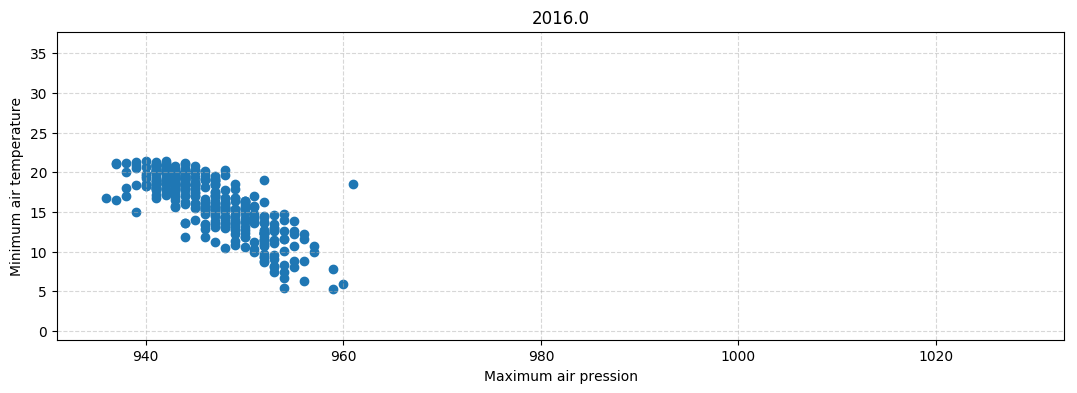

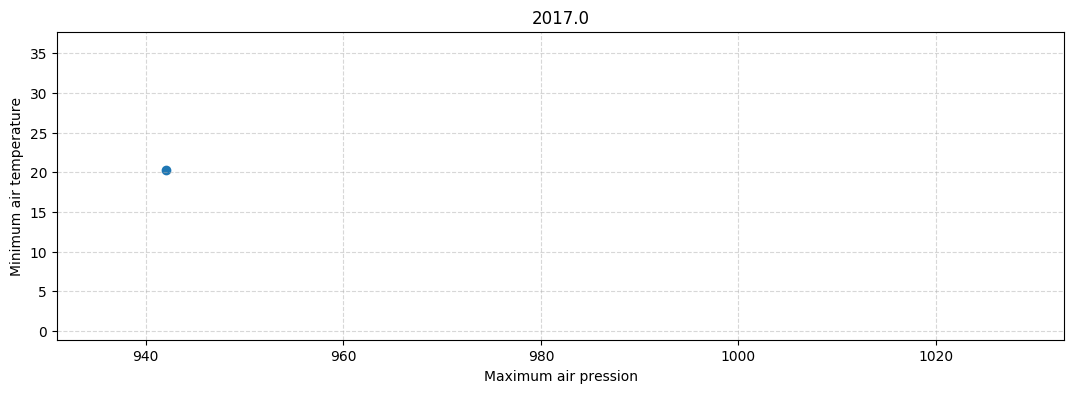

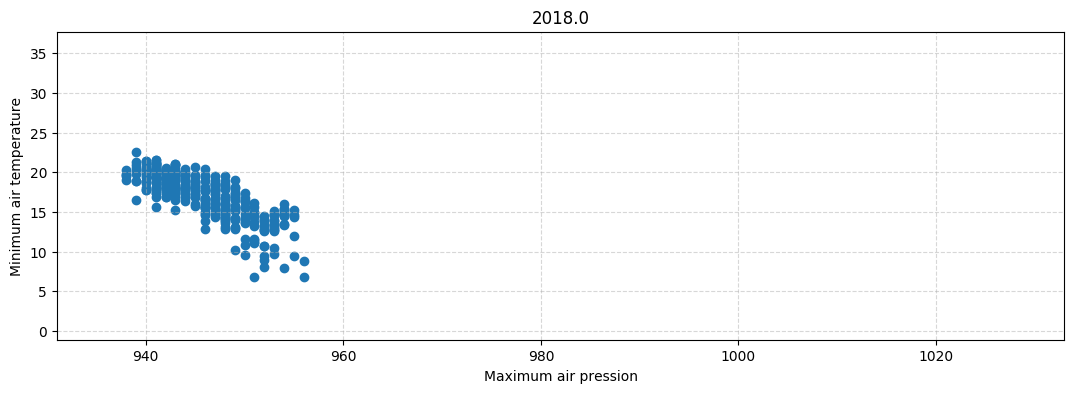

In [8]:
var1 = 'MAX_N_PRESSION_HPA'
var2 = 'MIN_N_AIRTMP_MED10'

min_x_value = data[var1].min() - 5
max_x_value = data[var1].max() + 5

min_y_value = data[var2].min() - 5
max_y_value = data[var2].max() + 5

for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Maximum air pression')
    plt.ylabel('Minimum air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [9]:
data[[var1, var2]].corr()

,MAX_N_PRESSION_HPA,MIN_N_AIRTMP_MED10
MAX_N_PRESSION_HPA,1.000000,-0.560647
MIN_N_AIRTMP_MED10,-0.560647,1.000000


A lot of values seems to be an outlier which make the plots be so sparse, although it seem to have a good correlation between Min air temperature and Max air pression

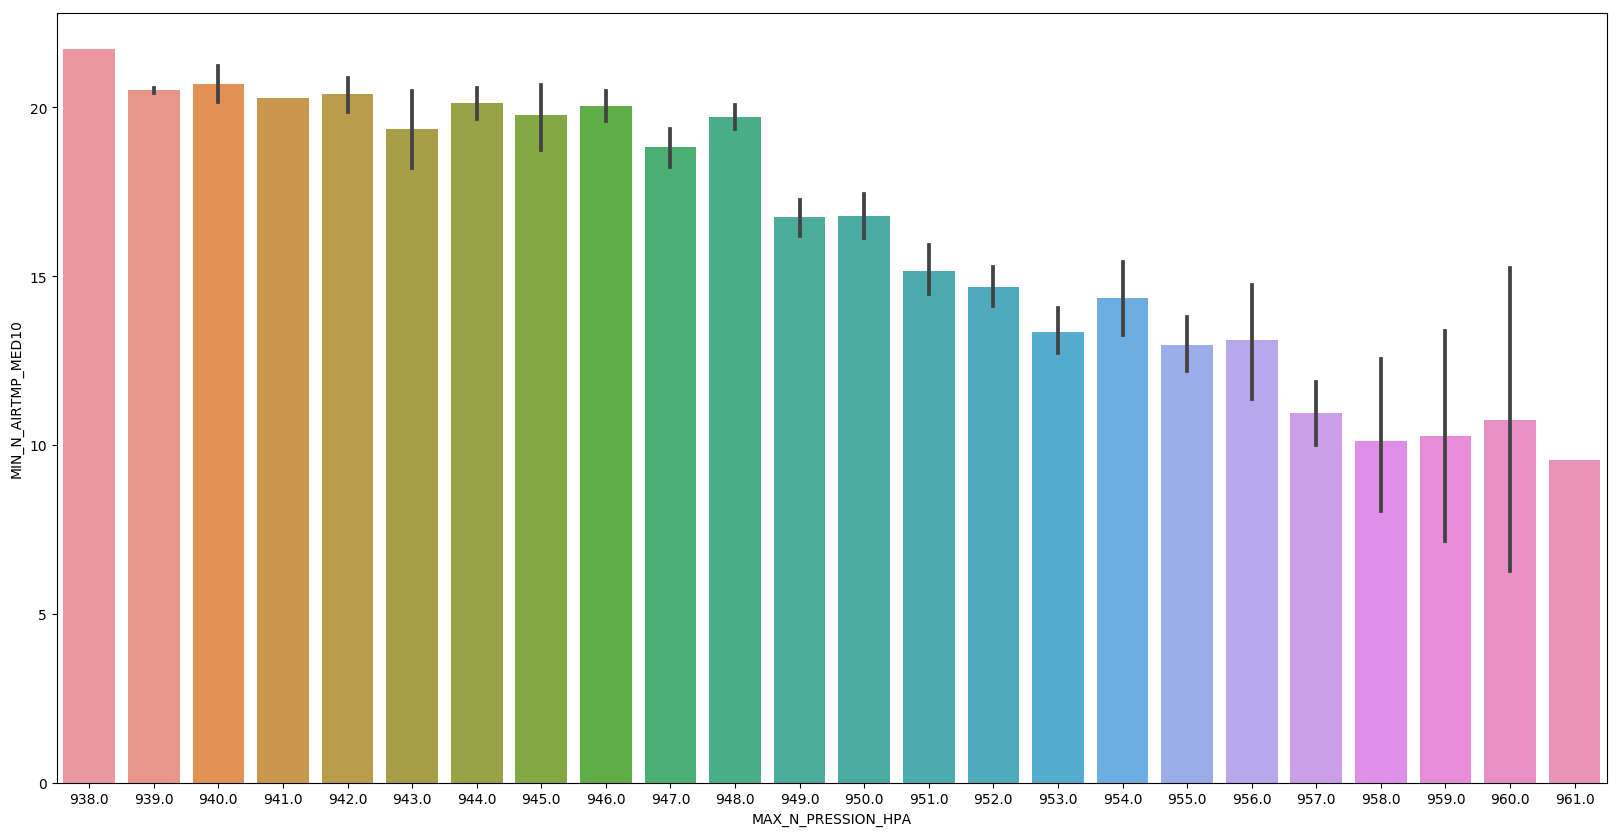

In [10]:
data_plot = data[data.YEAR == 2011]

plt.figure(figsize=(20,10))
sns.barplot(x= var1, y = var2, data = data_plot)

In [11]:
data_plot[var1].nunique()

24

When looked in year that doen't have outliers it is very clear the relationship

[Main menu](#0)

<a id=2></a>

# 2. Also, days with larger pression are driest (Max air pression x Min air moisture)

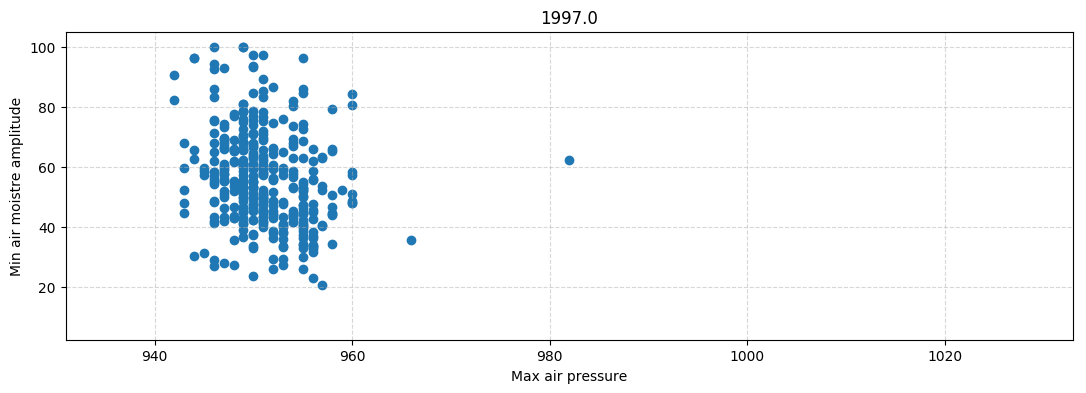

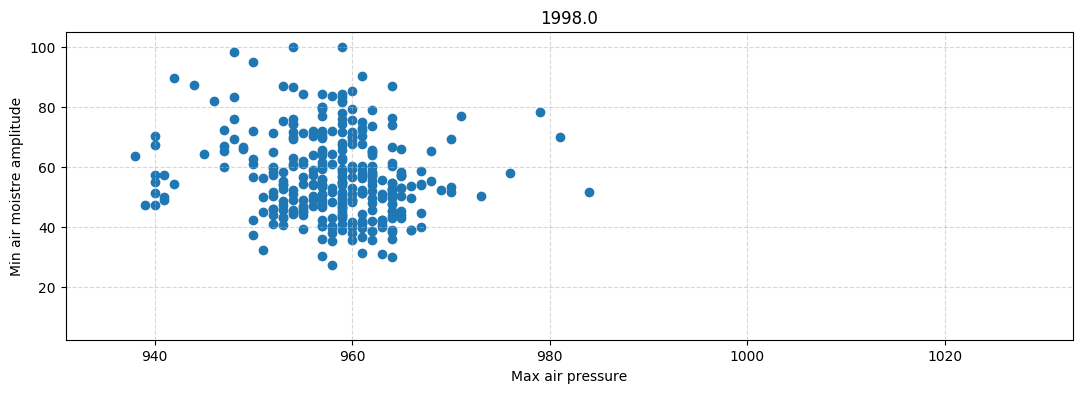

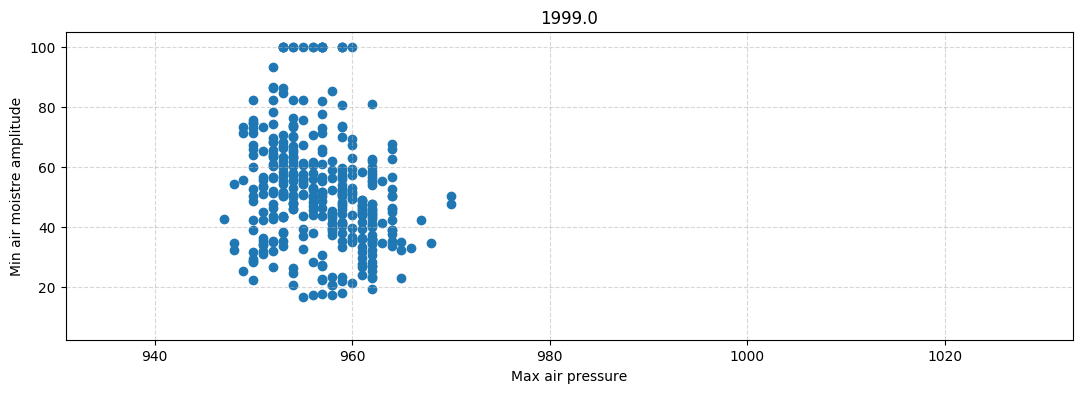

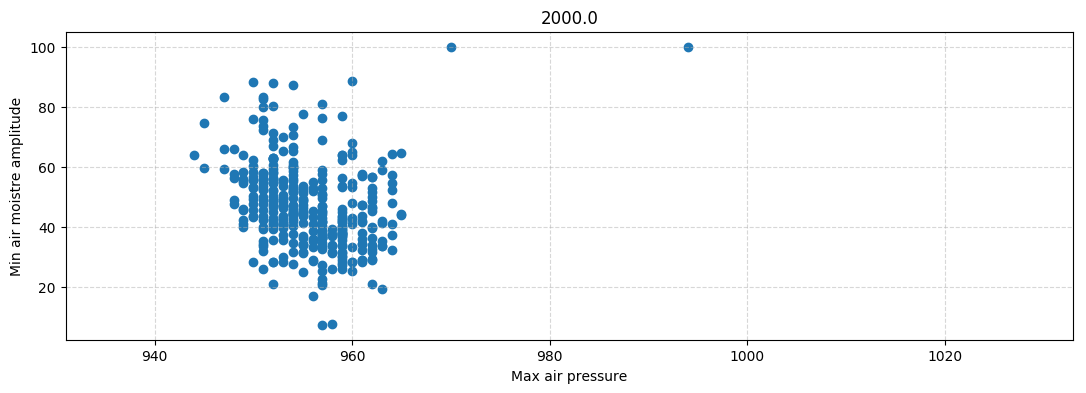

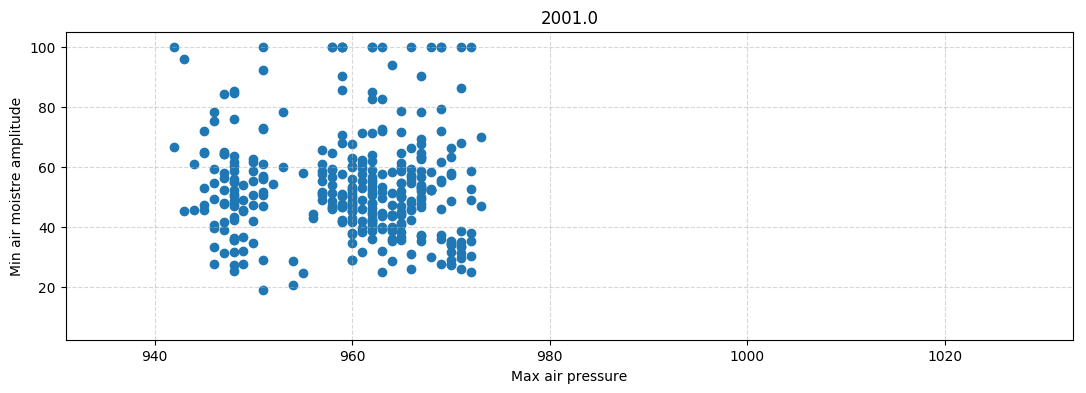

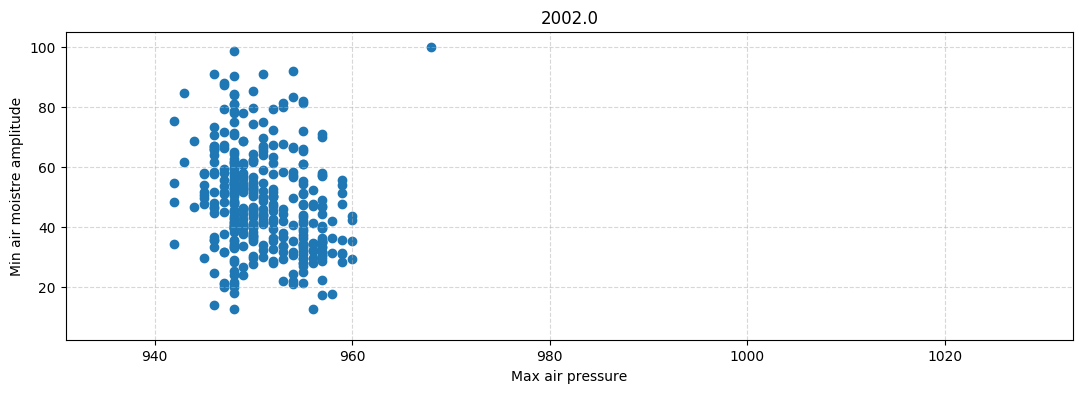

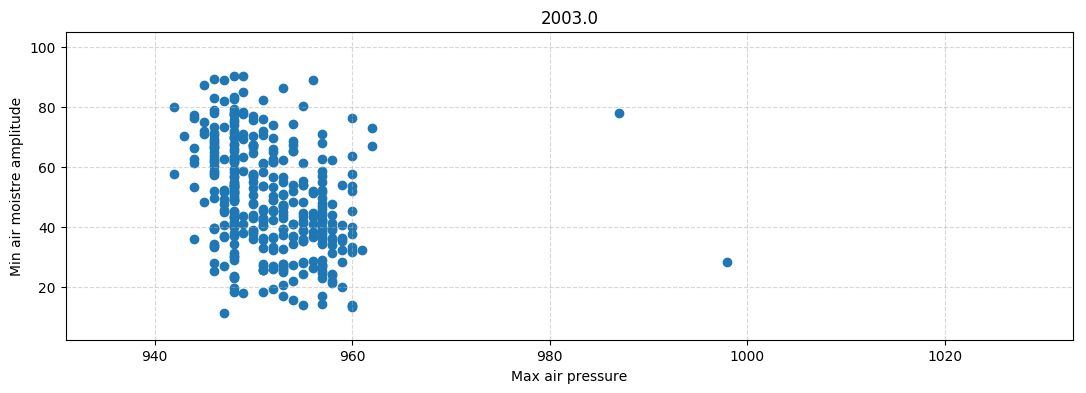

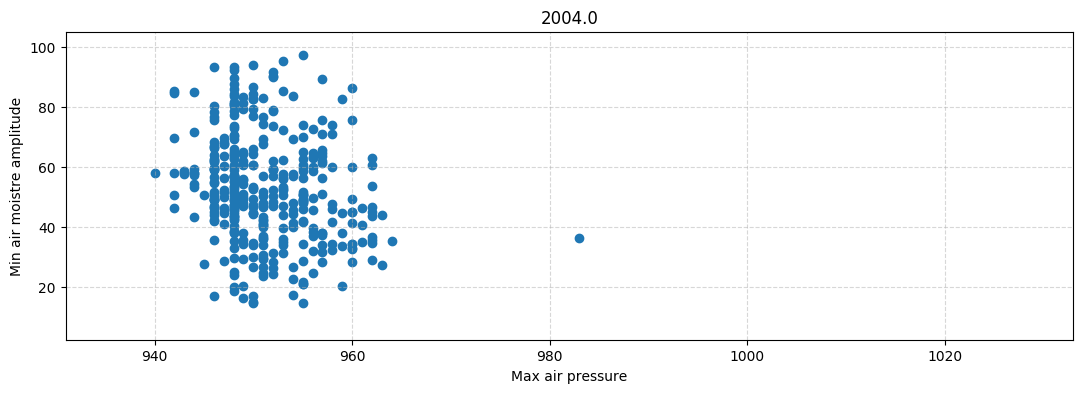

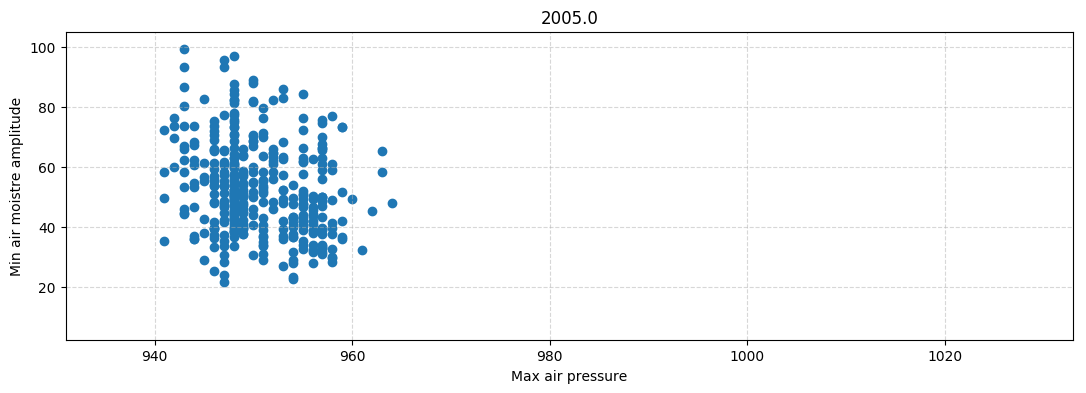

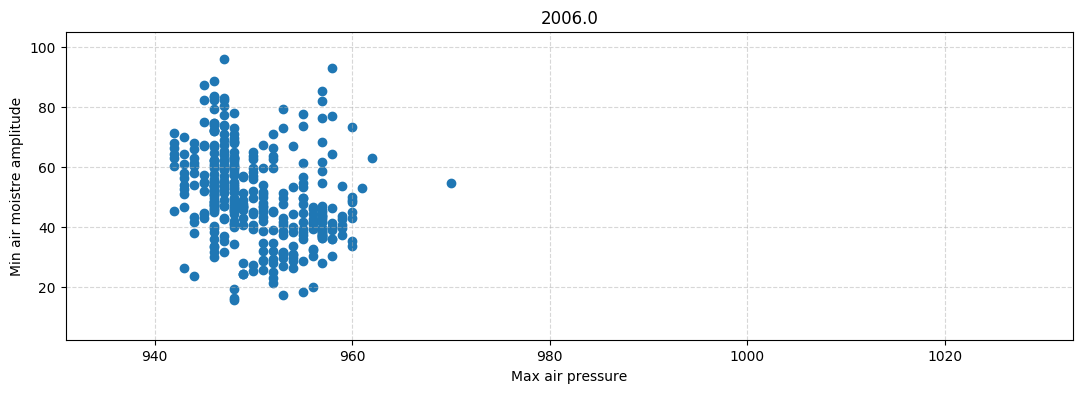

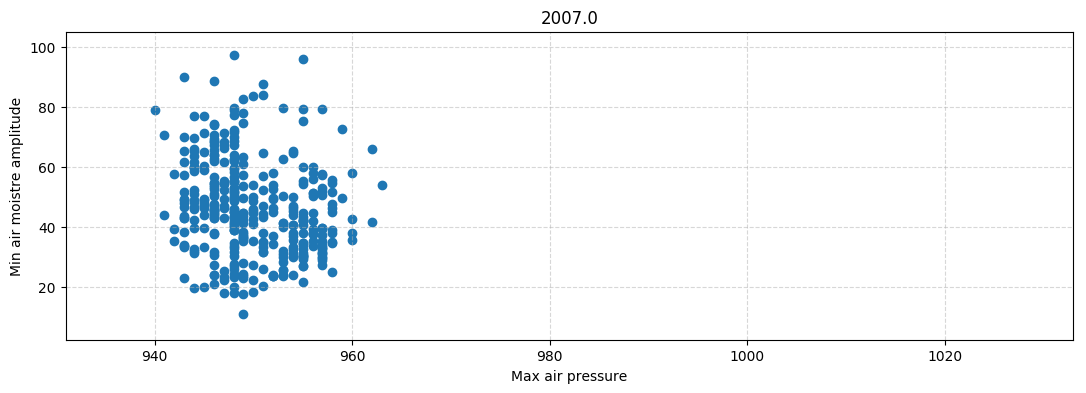

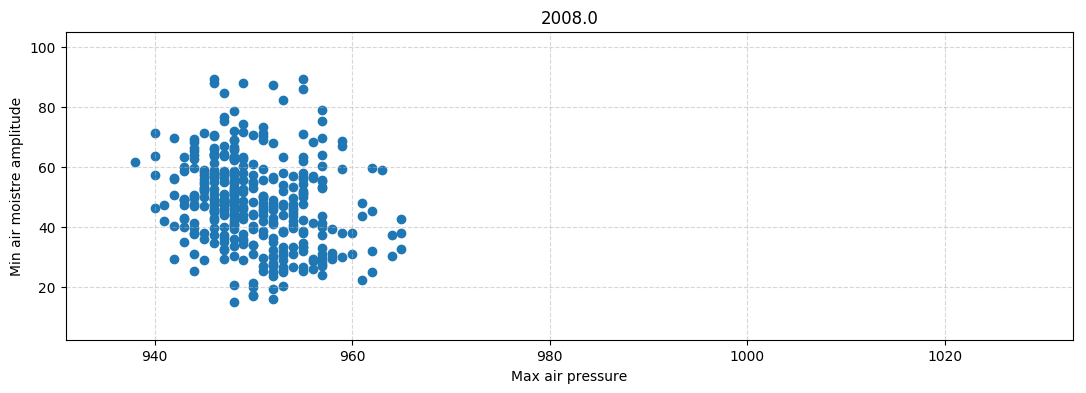

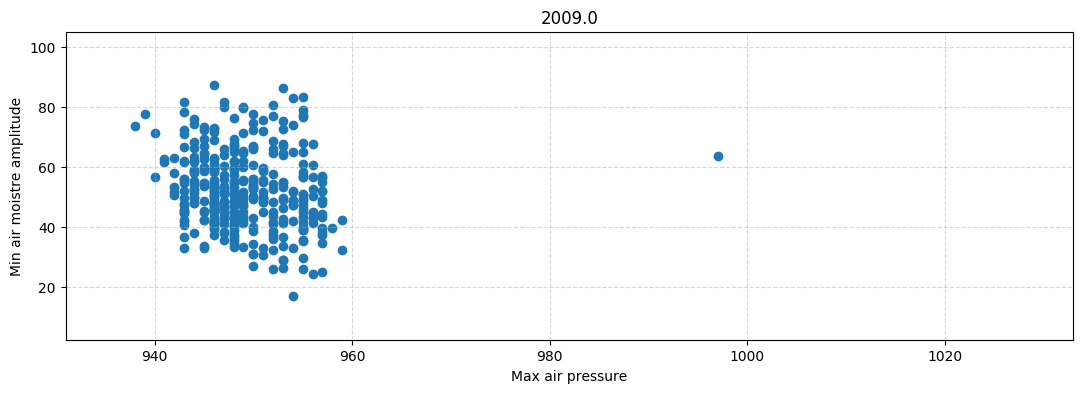

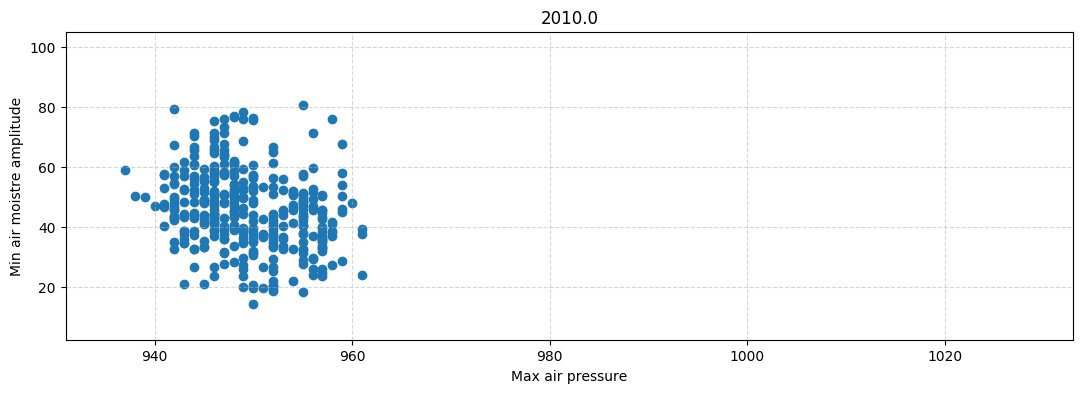

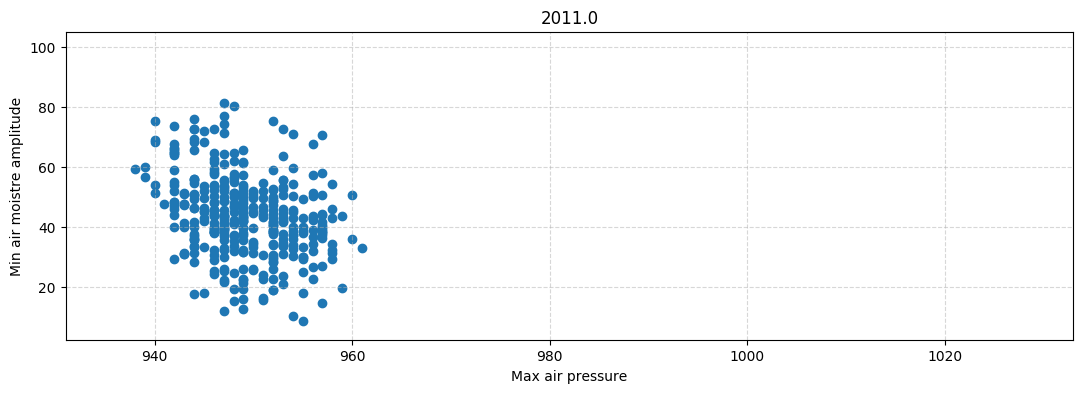

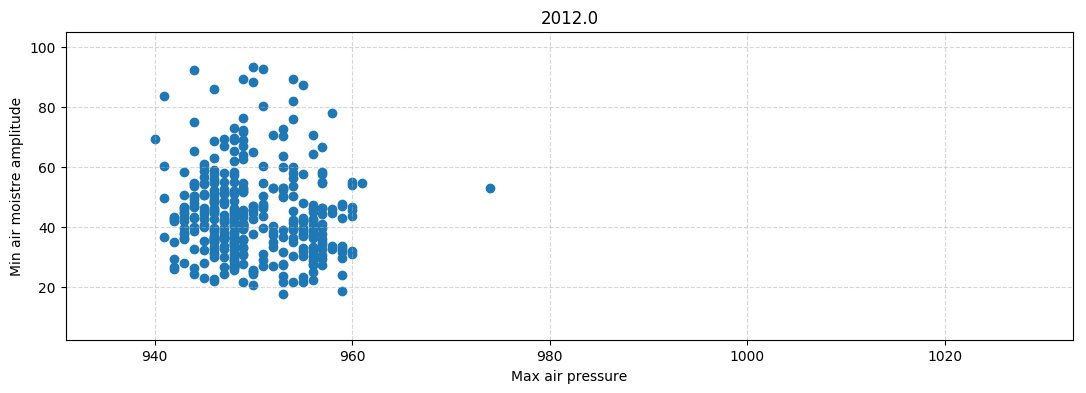

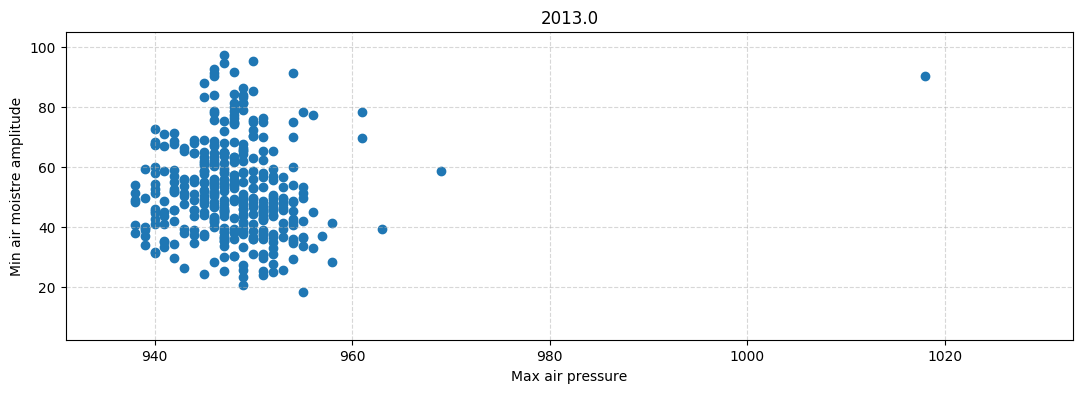

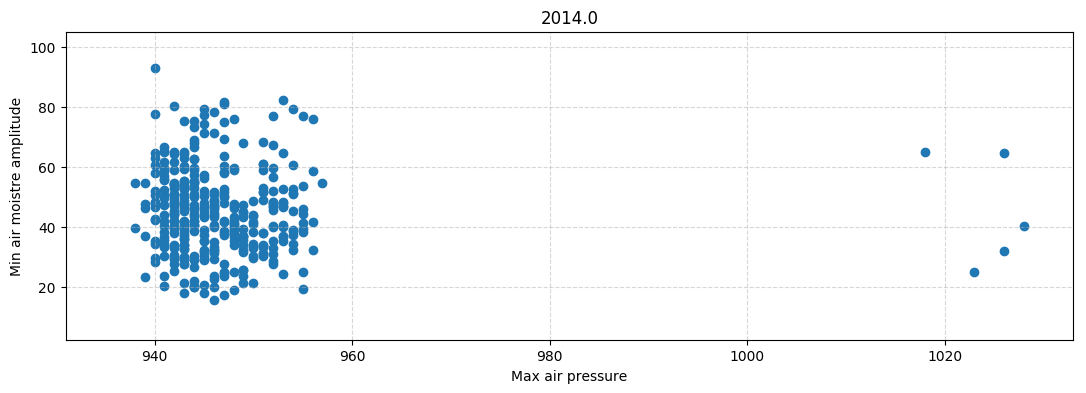

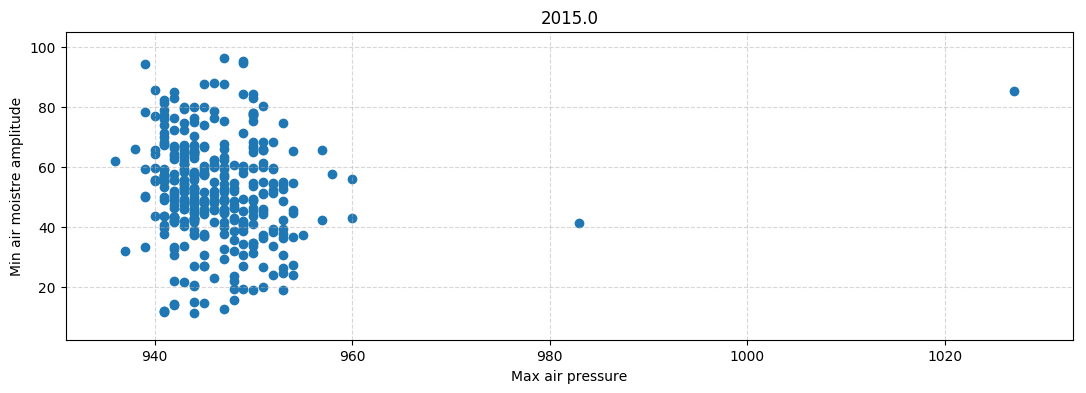

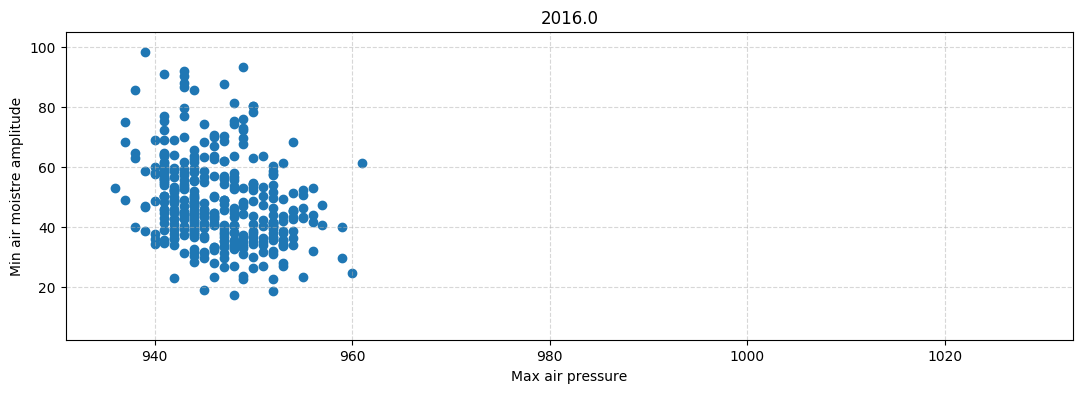

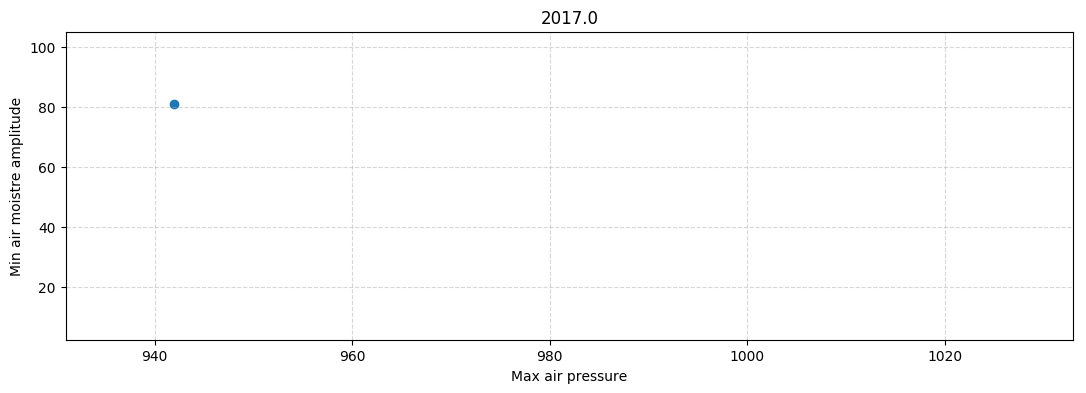

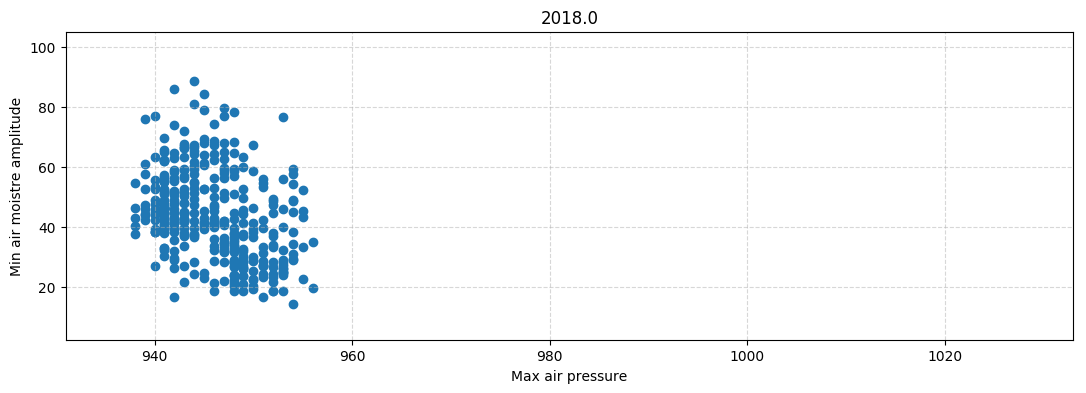

In [12]:
var1 = 'MAX_N_PRESSION_HPA'
var2 = 'MIN_N_AIRMTR_PCT10'

min_x_value = data[var1].min() - 5
max_x_value = data[var1].max() + 5

min_y_value = data[var2].min() - 5
max_y_value = data[var2].max() + 5

for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[var1], data_2plot[var2])
    plt.xlabel('Max air pressure')
    plt.ylabel('Min air moistre amplitude')
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [13]:
data[[var1, var2]].corr()

,MAX_N_PRESSION_HPA,MIN_N_AIRMTR_PCT10
MAX_N_PRESSION_HPA,1.000000,-0.073355
MIN_N_AIRMTR_PCT10,-0.073355,1.000000


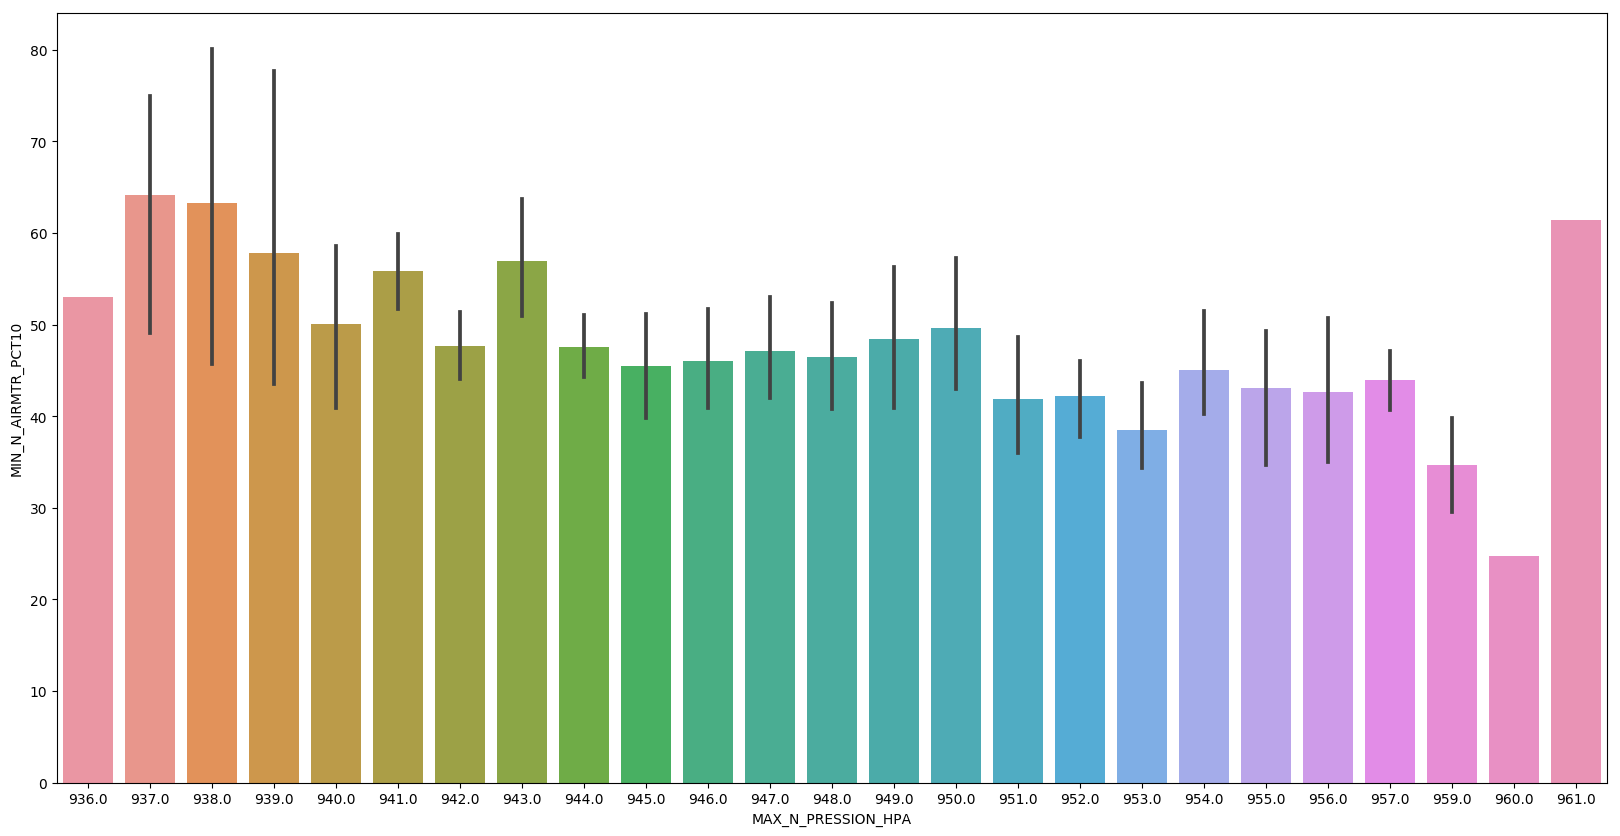

In [14]:
data_plot = data[data.YEAR == 2016]

plt.figure(figsize=(20,10))
sns.barplot(x= var1, y = var2, data = data_plot)

In [15]:
data[var1].nunique()

54

It doens't seems to have a correlation

[Main menu](#0)

<a id=3></a>

# 3. Heatwave: New visualizations

### First of all we will make 3 flags, one for each percentile: 90, 95 and 99 to get differents intensities of heatwaves, also meansured by min temperature and max temperature

In [115]:
# Defining function to get heatwave

# Creating a function that returns if there is information in some day
def check_day(data, day):
    
    if(data[data['DAY365'] == day].shape[0] == 0):
        return False
    else:
        return True


def get_heatwave(df, percentile, var_temp, var_hw,flag):
    data = df.copy()
    
    flag_heat = flag
    flag_unique_heat = var_hw
    var_temperature = var_temp

    # Defining variable that flags heta waves with zeros
    data[flag_heat] = 0
    data[flag_unique_heat] = 0


    for y in data['YEAR'].unique():
        data_year = data[data['YEAR'] == y]

        p95th = data_year[var_temperature].quantile(percentile)

        which_heat_wave = 1

        itera = iter(data_year['DAY365'].unique())

        for d in itera:

            if(not((check_day(data_year,d)) &  (check_day(data_year,d+1)) & (check_day(data_year,d+2)))):
    #             print(not((check_day(data_year,d)) &  (check_day(data_year,d+1)) & (check_day(data_year,d+2))))
                pass
            else:
    #             print('Entrou')
                i = 0
                if(data_year[data_year['DAY365'] == d][var_temperature].values > p95th):

                    if(data_year[data_year['DAY365'] == d+1][var_temperature].values > p95th):

                        if(data_year[data_year['DAY365'] == d+2][var_temperature].values > p95th):
    #                         next(itera)
    #                         next(itera)
                            #print('Começou onda de calor')
                            i = 2
                            while(data_year[data_year['DAY365'] == d+i][var_temperature].values > p95th):
                                data.loc[(data['YEAR'] == y) & (data['DAY365'] == d+i) , flag_heat] = 1
                                data.loc[(data['YEAR'] == y) & (data['DAY365'] == d+i) , flag_unique_heat] = which_heat_wave
    #                             print("Marcando")
                                i = i + 1
                                next(itera)

                            which_heat_wave = which_heat_wave + 1
    #                         next(itera)
    #                         next(itera)
                        else:
                            pass
                    else:
                        pass
                else:
                    pass
    
    return data

In [108]:
data[data['DAY365'] >= 152]['DAY365'].values - 151

array([   1.,    2.,    3., ...,  212.,  213.,  214.])

In [109]:
data[data['DAY365'] < 152]['DAY365'].values + 214

array([ 215.,  216.,  217., ...,  363.,  364.,  365.])

In [116]:
# To better visualyze the heat waves we wil work with a shifted dataframe starting in winter

data['NEW_DAY'] = data['DAY365']

data.loc[data['DAY365'] < 152 ,'NEW_DAY'] = data[data['DAY365'] < 152]['DAY365'].values + 214
data.loc[data['DAY365'] >= 152, 'NEW_DAY'] = data[data['DAY365'] >= 152]['DAY365'].values - 151

In [117]:
data.head()

,YEAR,DAY365,MAX_N_WNDVEL_5M,DIR_MAX_N_WNDVEL_5M,MIN_N_WNDVEL_5M,DIR_MIN_N_WNDVEL_5M,MEAN_N_WNDVEL_5M,MAX_N_WNDVEL_2M,DIR_MAX_N_WNDVEL_2M,MIN_N_WNDVEL_2M,...,DIR_MIN_N_PRESSION_HPA,MEAN_N_PRESSION_HPA,MAX_N_RAIN_SUM10,DIR_MAX_N_RAIN_SUM10,MIN_N_RAIN_SUM10,DIR_MIN_N_RAIN_SUM10,MEAN_N_RAIN_SUM10,MONTH,WEEK,NEW_DAY
0,1997.0,1.0,5561.0,9.33,0.892,31.87,2302.065328,3075.0,134.40,0.763,...,181.40,942.831933,0.0,8.32,0.0,8.32,0.0,1,0.0,215.0
1,1997.0,2.0,4266.0,154.70,0.363,63.72,1949.374418,2876.0,152.00,0.626,...,125.60,943.809091,0.0,131.60,0.0,131.60,0.0,1,0.0,216.0
2,1997.0,3.0,4835.0,162.40,2.050,131.10,2560.208496,2907.0,94.80,0.717,...,125.40,945.424779,0.0,148.20,0.0,148.20,0.0,1,0.0,217.0
3,1997.0,4.0,3246.0,157.30,0.461,40.96,1256.941059,1942.0,7.12,0.000,...,24.88,943.075630,0.0,157.30,0.0,157.30,0.0,1,0.0,218.0
4,1997.0,5.0,4188.0,147.10,0.000,157.70,1198.817863,2646.0,9.39,0.000,...,60.63,942.717742,0.0,19.87,0.0,19.87,0.0,1,0.0,219.0


# 3.1. Heatwave P90 and Mean temperature

In [124]:
# Lets try something: Lets iterate along days in a year checking for day, day + 1 and days + 2, if these days are exceeding p95th then we run while
# day+1 > p90th then flag with one

flag_heat = 'FLAG_HW_P95'
flag_unique_heat = 'FLAG_UNIQUE_HEATWAVE_P95'
var_temperature = 'MAX_N_AIRTMP_MED10'
percentile = .9

test = get_heatwave(data, percentile, var_temperature, flag_unique_heat,flag_heat)

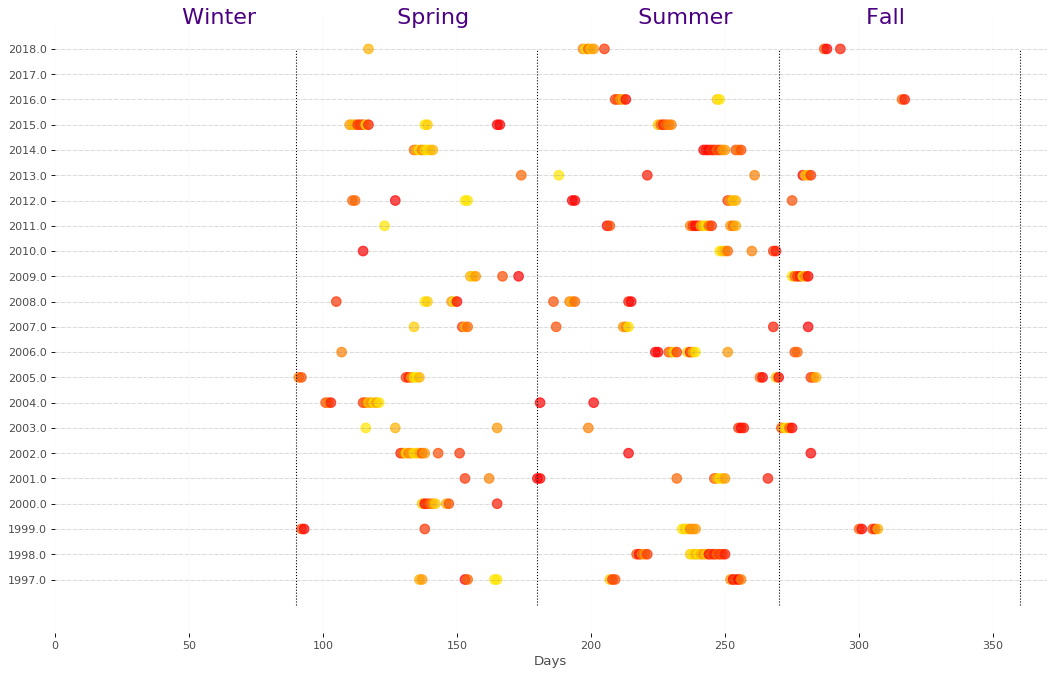

In [155]:
import matplotlib.patches as mpatches

FLAG_HEATWAVE = flag_unique_heat

df = test.copy()

def get_colors(df, var_temp,n=5):
    max_temp = df[var_temp].max()
    colors = []
    
    aux_df = df.copy()
    
    aux_df['bins'] = pd.qcut(aux_df[var_temp], n, labels=False, duplicates='drop')
    
    for tmp in aux_df['bins']:

        color = (1,tmp/n,0)
        colors.append(color)

    
    return colors, aux_df

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=np.arange(df.YEAR.nunique()), xmin=0, xmax=3000, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.YEAR.unique()):
    df_make = df.loc[(df.YEAR==make) & (df[flag_heat] == 1), :]
    
    colors, aux_df = get_colors(df_make, var_temperature, n=10)

    ax.scatter(y=np.repeat(i, df_make.shape[0]), x='NEW_DAY', data=df_make, s=75, edgecolors=colors , c=colors , alpha=0.7)



# Decorations

# Vertical Lines to indicate Stations according to https://www.calendario-365.com.br/epocas-estacoes-do-ano.html
ax.vlines(x= 360 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x= 90 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x= 180, ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x= 270 , ymin=-1, ymax=21, color='black', alpha=1, linewidth=1, linestyles='dotted')

#Annotates
ax.text(45, 22, " Winter ", fontdict={'size':20}, color='indigo')
ax.text(125, 22, " Spring ", fontdict={'size':20}, color='indigo')
ax.text(215, 22, " Summer ", fontdict={'size':20}, color='indigo')
ax.text(300, 22, " Fall ", fontdict={'size':20}, color='indigo')


#Corpse
# ax.set_title('Monthly heatwaves distribution by years', fontdict={'size':22})
ax.set_xlabel('Days', alpha=0.7, fontdict={'size':12})
ax.set_yticks(np.arange(df.YEAR.nunique()))
ax.set_yticklabels(df.YEAR.unique(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(0, 370)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

In [154]:
aux_df[[var_temperature,'bins']]

,MAX_N_AIRTMP_MED10,bins
7279,33.57,1
7280,32.49,0
7285,32.86,0
7474,33.88,3
7552,33.81,2
7553,35.10,4
7554,33.79,2
7555,34.59,4
7556,33.86,3
7560,33.27,1


In [132]:
colors

array([ 0.53246259,  0.64866766,  0.05602775,  0.40369706,  0.95150519,
        0.57133123,  0.3599123 ,  0.86271715,  0.65305564,  0.67368538])

# 3.2. Heatwave Percentile 95 Mean temperature

In [24]:
# Lets try something: Lets iterate along days in a year checking for day, day + 1 and days + 2, if these days are exceeding p95th then we run while
# day+1 > p90th then flag with one

flag_heat = 'FLAG_HEATWAVE_P95'
flag_unique_heat = 'FLAG_UNIQUE_HEATWAVE_P95'
var_temperature = 'MEAN_N_AIRTMP_MED10'
percentile = .95

# Defining variable that flags heta waves with zeros
data[flag_heat] = 0
data[flag_unique_heat] = 0

# Creating a function that returns if there is information in some day
def check_day(data, day):
    if(data[data['DAY365'] == day].shape[0] == 0):
        return False
    else:
        return True



for y in data['YEAR'].unique():
    data_year = data[data['YEAR'] == y]
    
    p95th = data_year[var_temperature].quantile(percentile)

    which_heat_wave = 1
    
    itera = iter(data_year['DAY365'].unique())
    
    for d in itera:
        
        if(not((check_day(data_year,d)) &  (check_day(data_year,d+1)) & (check_day(data_year,d+2)))):
#             print(not((check_day(data_year,d)) &  (check_day(data_year,d+1)) & (check_day(data_year,d+2))))
            pass
        else:
#             print('Entrou')
            i = 0
            if(data_year[data_year['DAY365'] == d][var_temperature].values > p95th):
        
                if(data_year[data_year['DAY365'] == d+1][var_temperature].values > p95th):
                
                    if(data_year[data_year['DAY365'] == d+2][var_temperature].values > p95th):
#                         next(itera)
#                         next(itera)
                        #print('Começou onda de calor')
                        i = 2
                        while(data_year[data_year['DAY365'] == d+i][var_temperature].values > p95th):
                            data.loc[(data['YEAR'] == y) & (data['DAY365'] == d+i) , flag_heat] = 1
                            data.loc[(data['YEAR'] == y) & (data['DAY365'] == d+i) , flag_unique_heat] = which_heat_wave
#                             print("Marcando")
                            i = i + 1
                            next(itera)
                        
                        which_heat_wave = which_heat_wave + 1
#                         next(itera)
#                         next(itera)
                    else:
                        pass
                else:
                    pass
            else:
                pass